In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inputs = np.array([[1, 2, 3, 2.5],
                  [2, 5, -1, 2], 
                  [-1.5, 2.7, 3.3, -0.8]])

weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])
biases = [2, 3, 0.5]

weights1 = np.array([[0.1, -0.14, 0.5], 
                    [-0.5, 0.12, -0.33],
                    [-0.44, 0.73, -0.13]])
biases1 = [-1, 2, -0.5]

layer1_output = np.dot(inputs, weights.T) + biases
layer2_output = np.dot(layer1_output, weights1.T) + biases1
layer2_output

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

In [3]:
np.random.seed(0)
X = np.array([[1, 2, 3, 2.5],
                  [2, 5, -1, 2], 
                  [-1.5, 2.7, 3.3, -0.8]])

In [4]:
class Dense_layer():
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    
        

In [5]:
layer1 = Dense_layer(4, 5)
layer2 = Dense_layer(5, 2)

In [6]:
layer1.forward(X)
layer1.output

array([[ 0.10758131,  1.03983522,  0.24462411,  0.31821498,  0.18851053],
       [-0.08349796,  0.70846411,  0.00293357,  0.44701525,  0.36360538],
       [-0.50763245,  0.55688422,  0.07987797, -0.34889573,  0.04553042]])

In [7]:
layer2.forward(layer1.output)
layer2.output

array([[ 0.148296  , -0.08397602],
       [ 0.14100315, -0.01340469],
       [ 0.20124979, -0.07290616]])

# Activation Functions

- Step Function
- Sigmoid Function
- Rectified Linear Function (ReLU)

### ReLU

In [8]:
inputs = [0, 2, -1, 3.3, 2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    output.append(max(0,i))
output

[0, 2, 0, 3.3, 2.7, 1.1, 2.2, 0]

In [9]:
class ReLU():
    def forward(self, inputs):
        self.output = np.maximum(0,inputs)

In [10]:
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [16]:
X, y = spiral_data(100,3)

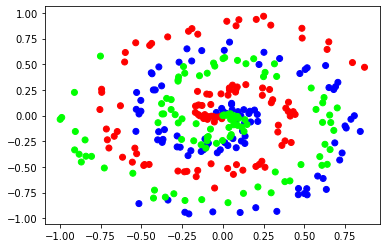

In [17]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap='brg')
plt.show()

In [22]:
layer1 = Dense_layer(2, 5)
layer1.forward(X)
activation1 = ReLU()
activation1.forward(layer1.output)
activation1.output

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.11499701e-06, 0.00000000e+00, 0.00000000e+00, 2.06839004e-04,
        6.51810473e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.73860989e-04,
        1.01789814e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.53039063e-02, 4.49496368e-02,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.32448009e-02, 1.06640626e-01,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.56406046e-02, 1.05640600e-01,
        0.00000000e+00]])

## Softmax Activation

In [44]:
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]
exp_vals = np.exp(layer_outputs)
exp_vals
norm_vals = exp_vals/np.sum(exp_vals, axis = 1, keepdims = True)
print(norm_vals)
print(np.sum(norm_vals, axis = 1))

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
[1. 1. 1.]


In [46]:
class softmax():
    def forward(self, inputs):
        exp_vals = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        probabilties = exp_vals / np.sum(exp_vals, axis = 1, keepdims = True)
        self.output = probabilities

## Calcuating Loss

In [53]:
softmax_output = [0.7, 0.1, 0.2]
# target_class = 0, index 0 is hot and length of output is 3
target_output = [1, 0, 0]
loss = -(np.log(softmax_output[0]) * target_output[0]+
         np.log(softmax_output[1]) * target_output[1]+
         np.log(softmax_output[2]) * target_output[2])
print(loss)
-np.log(softmax_output[0]) * target_output[0]

0.35667494393873245


0.35667494393873245

In [60]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]
log_loss = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
avg_loss = np.mean(log_loss)
avg_loss

0.38506088005216804

In [72]:
class loss():
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
class loss_CategoricalCrossEntropy(loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        clipped = np.clip(y_pred, (1e-7, 1-1e-7))
        
        if len(y_true.shape) == 1:
            correct_confidences = clipped[range(samples), y_true]
        else:
            correct_confidences = np.sum(clipped * y_true, axis = 1)
        neg_log_liklihood = -np.log(correct_confidences)
        return neg_log_liklihood

In [75]:
preds = np.argmax(softmax_outputs, axis = 1)

In [76]:
np.mean(preds == class_targets)

1.0